In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set_theme(style="whitegrid")

In [41]:
cleaned_bristol_broadband_df= pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-broadband-cleaned.csv")
cleaned_cornwall_broadband_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-broadband-cleaned.csv")
cleaned_broadband_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/combined-broadband-cleaned.csv")

In [36]:
cleaned_broadband_df.columns

Index(['postcode', 'postcode_space', 'postcode area',
       'Average_download_speed_Mbit_s', 'Maximum_download_speed_Mbit_s',
       'Minimum_download_speed_Mbit_s', 'Average_upload_speed_Mbit_s',
       'Maximum_upload_speed_Mbit_s', 'Minimum_upload_speed_Mbit_s',
       'Average_data_usage_GB', 'All Premises', 'All Matched Premises',
       'lsoa_area', 'county'],
      dtype='object')

In [43]:
postcode_to_county = {
    "BS": "CITY OF BRISTOL",
    "PL": "CORNWALL",
    "TR": "CORNWALL"
}

cleaned_broadband_df['county'] = cleaned_broadband_df['postcode area'].map(postcode_to_county)

Average Download Speeds Boxplot

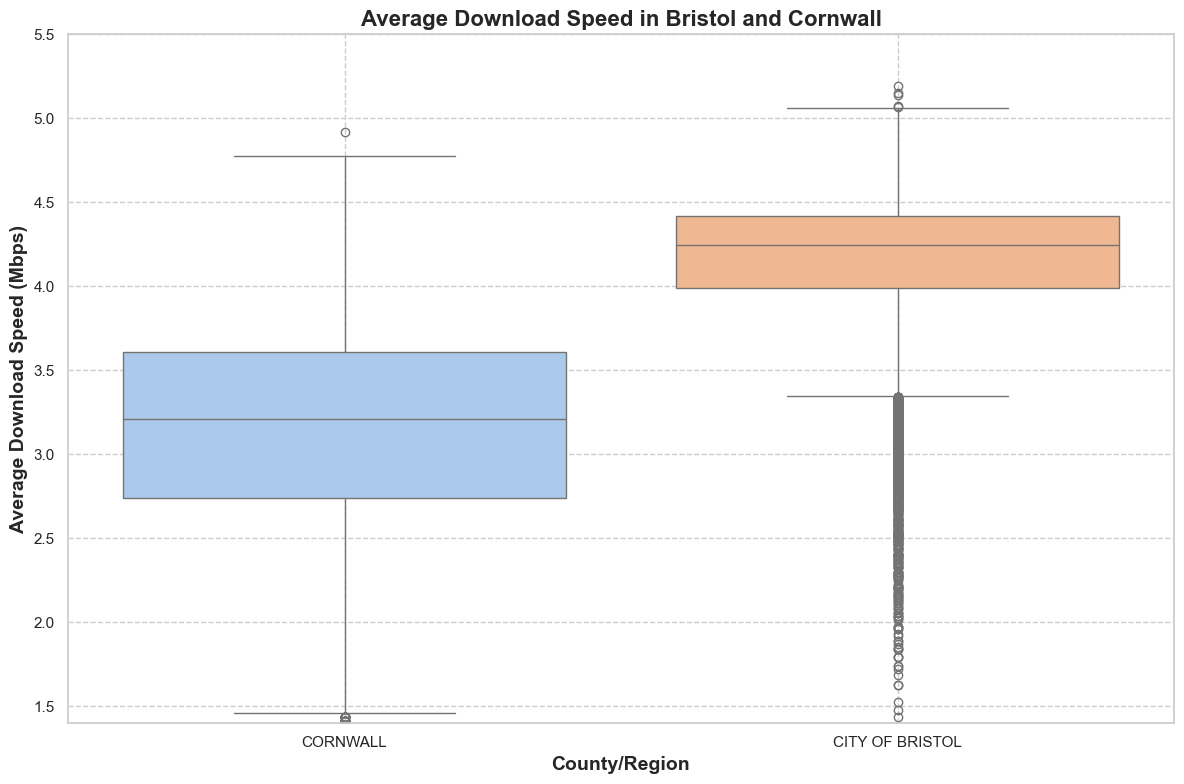

In [76]:
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(
    data=cleaned_broadband_df,
    x='county',
    y='Average_download_speed_Mbit_s',
    hue='county',  
    palette='pastel',  
    dodge=False  
)
plt.title('Average Download Speed in Bristol and Cornwall', fontsize=16, weight='bold')
plt.xlabel('County/Region', fontsize=14, weight='bold')
plt.ylabel('Average Download Speed (Mbps)', fontsize=14, weight='bold')
plt.ylim(1.4, 5.5)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


Creating a Function for Bar Charts

In [14]:
cleaned_bristol_broadband_df.columns

Index(['postcode', 'postcode_space', 'postcode area',
       'Average_download_speed_Mbit_s', 'Maximum_download_speed_Mbit_s',
       'Minimum_download_speed_Mbit_s', 'Average_upload_speed_Mbit_s',
       'Maximum_upload_speed_Mbit_s', 'Minimum_upload_speed_Mbit_s',
       'Average_data_usage_GB', 'All Premises', 'All Matched Premises',
       'lsoa_area', 'county'],
      dtype='object')

In [62]:
def create_bar_chart(data, county_name, sample_size):
    filtered_data = data[data['county'] == county_name]
    grouped_data = (
        filtered_data
        .groupby('lsoa_area')
        .agg(
            average=('Average_download_speed_Mbit_s', 'mean'),
            maximum=('Maximum_download_speed_Mbit_s', 'max')
        )
        .reset_index()
    )
    
    sampled_data = grouped_data.sample(n=sample_size)
    
    melted_data = sampled_data.melt(id_vars='lsoa_area', value_vars=['average', 'maximum'],
                                    var_name='speed_type', value_name='speed')
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=melted_data, x='lsoa_area', y='speed', hue='speed_type', palette='viridis', dodge=True)
    plt.title(f'average and maximum speed of LSOAs in {county_name}')
    plt.xlabel('LSOAs')
    plt.ylabel('Download speed in mbps')
    plt.xticks(rotation=90)
    plt.legend(title='Speed')
    plt.tight_layout()
    plt.show()

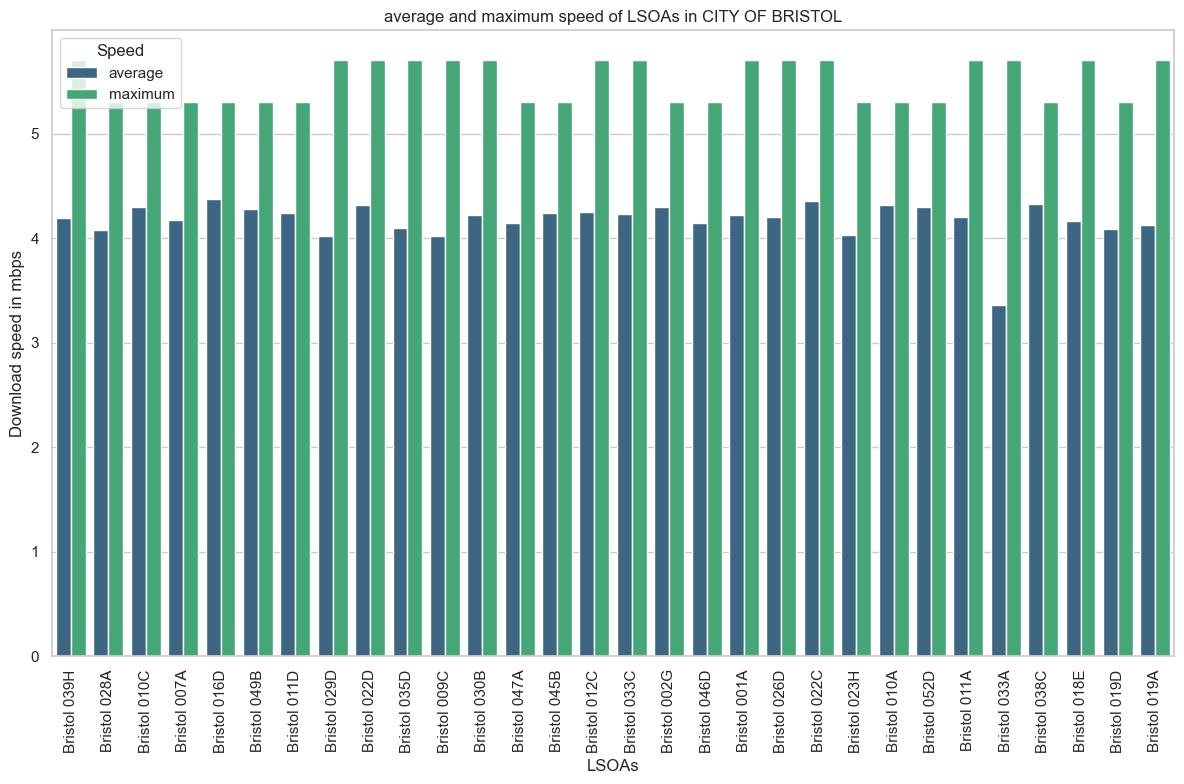

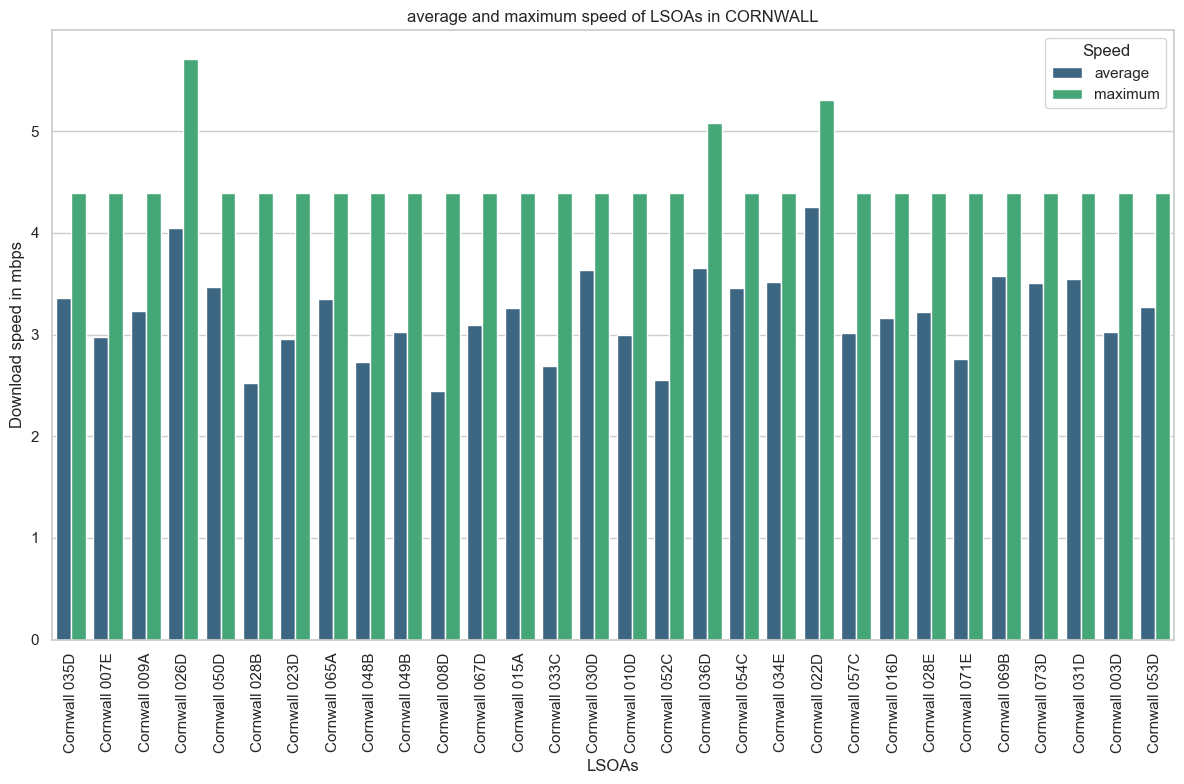

In [63]:
create_bar_chart(cleaned_broadband_df, "CITY OF BRISTOL", 30)
create_bar_chart(cleaned_broadband_df, "CORNWALL", 30)